<a href="https://colab.research.google.com/github/gopal2812/mlblr/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime
import os
import pandas as pd
import numpy as np
#import pylab as plt
#from pylab import rcParams
import math
#import matplotlib as plt
import pylab as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import concatenate
from pylab import rcParams


In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
#data = pd.read_csv('data.csv', usecols=['ts', 'rtd'])
data2 = pd.read_csv('client.csv', usecols=['Date', 'AP_Num'])
#testData = pd.read_csv('test_data.csv', usecols=['ts', 'rtd']) 
testData2 = pd.read_csv('client.csv', usecols=['Date', 'AP_Num']) 
print(data2.head(10))

In [0]:
ap_num = data2.AP_Num.values
#data2 = data2.assign(date = pd.to_datetime(data2['Date'], unit='s'))

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        i = i * 5
        #s find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
  
look_back=60
look_forward=5
n_features=1

trainX, trainY = split_sequence(ap_num, look_back, look_forward)



trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(look_forward))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=100, verbose=2)

test_ap = testData2.AP_Num.values
test_ap_scaled = test_ap

testX, testY = split_sequence(test_ap_scaled, look_back, look_forward)
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))

  

In [0]:
pred_train = model.predict(trainX)
#pred_train = scaler.inverse_transform(pred_train)
pred_train = pred_train.flatten()

#trainY = scaler.inverse_transform(trainY) 
trainY = trainY.flatten()

pred_test = model.predict(testX)
#pred_test = scaler.inverse_transform(pred_test)
pred_test = pred_test.flatten()

#testY = scaler.inverse_transform(testY)
testY = testY.flatten()

test_rmse = math.sqrt(mean_squared_error(testY, pred_test))
test_mae = mean_absolute_error(testY, pred_test)
  
print('test_rmse: %.2f' %test_rmse)
print('test_mae: %.2f' %test_mae)


In [0]:
x = [datetime.datetime.fromtimestamp(1555961400) + datetime.timedelta(seconds=i) for i in range(86400)]
x1 = [i.time() for i in x]
x2=list()
for i in range(1,86400):
    if i%10==0:
        x2.append(x1[i])
    

t = 100
t1 = 300

t = 2500
t1 = 3500

plt.ylim(0, 20), #plt.xlim(0, 2*t), 
plt.plot(x[t:t1], trainY[t:t1], '-b', label='train'),
plt.plot(x[t:t1], pred_train[t:t1], '-r', label = 'pred_train')
plt.legend(loc='upper right')
plt.show()


In [0]:
t = 1
t1 = 4000

plt.ylim(0, 15), #plt.xlim(0, 2*t), 
plt.plot(x2[t:t1], testY[t:t1], '-b', label='test'),
plt.plot(x2[t:t1], pred_test[t:t1], '-r', label = 'pred_test')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('RTD (seconds)')
plt.show()



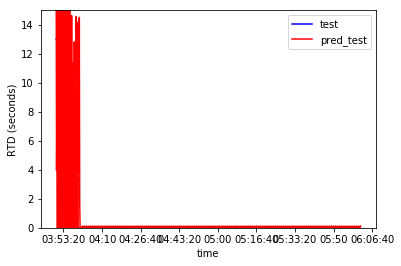

In [29]:
#@title
t = 3000
t1 = 3760
t2 = 3790
plt.ylim(0, 15), #plt.xlim(0, 2*t), 
plt.plot(x2[t:t1], testY[t:t1], '-b', label='test'),
plt.plot(x2[t:t2], pred_test[t:t2], '-r', label = 'pred_test')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('RTD (seconds)')
plt.show()


In [0]:
!ls